In [1]:
!pip install python-doc
!python3 -m pip install docx2txt
!pip install textract
!sudo apt-get install antiword
!pip install python-docx
!pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.7/39.7 MB 16.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 39.9 MB/s eta 0:00:00
  Attempting uninstall: sphinx
    Found existing installation: Sphinx 3.5.4
    Uninstalling Sphinx-3.5.4:
      Successfully uninstalled Sphinx-3.5.4
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for docx2txt: filename=docx2txt-0.8-py3-none-any.whl size=3977 sha256=143881f0e7abc661813ec55d097f86239a2913203fa2bda0d05523e4b8835ee2
  Stored in directory: /root/.cache/pip/wheels/40/75/01/e6c444034338bde9c7947d3467807f889123465c2371e77418
Successfully built docx2txt
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 29.4 MB

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
import os,re
import docx2txt
import textract
import pandas as pd
import numpy as np
from docx import Document
import nltk
nltk.download('punkt')
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score,precision_score
from pandas.plotting import scatter_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
nltk.download("stopwords")
import xgboost as xgb

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [4]:
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
!python -m spacy download en_core_web_sm

/usr/local/lib/python3.9/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
2023-03-28 09:20:27.481166: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-28 09:20:29.209302: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2023-03-28 09:20:29.209494: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open share

In [6]:
os.listdir('/content/drive/MyDrive/Resumes')

['React Developer_Haripriya.docx',
 'Reactjs Developer_M Lokesh.docx',
 'Internship_Ravali_Musquare Technologies (1).docx',
 'Internship_Susovan Bag_Musquare Technologies.docx',
 'Reactjs Developer_MD Khizaruddin Rauf _Musquare Technologies.docx',
 'React Developer_Naveen sadhu.docx',
 'React Developer_Pragnya.docx',
 'React Developer_Sarala Madasu-converted.docx',
 'React Dev_Krishna Kanth.docx',
 'React Developer_Kamalakar Reddy.docx',
 'Reactjs Developer_Ranga Gaganam_Musquare Technologies.docx',
 'React Developer_PavasGoswami.doc',
 'Reactjs Developer_kambala sai surendra_Musquare Technologies.docx',
 'Reactjs Developer_Pranish Sonone_Musquare Technologies.docx',
 'Reactjs Developer_Prabakaran_Musquare Technologies.pdf',
 'React JS Developer_AnjaniPriyadarshini.doc',
 'React JS Developer_KotaniDurgaprasad[3_1] (1)-converted.docx',
 'React Developer_Thirupathiamma.docx',
 'React Developer_Vinay Reddy.doc',
 'Reactjs Developer_Shaik Abdul Sharuk_Musquare Technologies.docx',
 'React D

In [7]:
file_path = []
categories = []

In [8]:
directory = '/content/drive/MyDrive/Resumes'
for i in os.listdir(directory):
  if i.endswith('.docx') or i.endswith('.doc') or i.endswith('.pdf'):
    os.path.join(directory, i)
    file_path.append((textract.process(os.path.join(directory, i))).decode('utf-8'))
    categories.append('React JS Developer Resume')

In [9]:
file_path

['HARIPRIYA BATTINA \n\nExperience as UI Developer in Reactjs, JavaScript. \n\nPhone: +91 9908576950 \n\nGmail: haripriyabattini@gmai.com \n\nLocation: Visakhapatnam \n\nJOB OBJECTIVE ● Looking for a challenging role to put my experience in various aspects of technology with an objective to be a leading source of information and guidance concerning th\n\ntechnological requirements. \n\n● Want to be a part of a reputed organization that allows me to effectively use my \n\ntechnical skills in the real world for overall growth of organization and my \n\nprofessional career. \n\nWORK EXPERIENCE EDUCATION \n\n1. Associate UI Developr \n\nCompany: Blue Yonder, Hyderabad. \n\n● Work Done On “COPERNICUS” Project. \n\n● The Main Moto of this project is, it is GTM (Go To Market) Portal which is specially designed for demo teams to shower case Blue Yonder Products and Features for Customers and Partners \n\n● Technologies: HTML, CSS, React JS. \n\n● IDE: VS Code. \n\n● Methodologies: Agile. \n\nJ

In [10]:
categories

['React JS Developer Resume',
 'React JS Developer Resume',
 'React JS Developer Resume',
 'React JS Developer Resume',
 'React JS Developer Resume',
 'React JS Developer Resume',
 'React JS Developer Resume',
 'React JS Developer Resume',
 'React JS Developer Resume',
 'React JS Developer Resume',
 'React JS Developer Resume',
 'React JS Developer Resume',
 'React JS Developer Resume',
 'React JS Developer Resume',
 'React JS Developer Resume',
 'React JS Developer Resume',
 'React JS Developer Resume',
 'React JS Developer Resume',
 'React JS Developer Resume',
 'React JS Developer Resume',
 'React JS Developer Resume',
 'React JS Developer Resume',
 'React JS Developer Resume',
 'React JS Developer Resume']

In [11]:
file_path1=[]
categories_1=[]

In [12]:
directory_1 = '/content/drive/MyDrive/Resumes/Peoplesoft resumes'
for i in os.listdir(directory_1):
  if i.endswith('.docx') or i.endswith('.doc') or i.endswith('.pdf'):
    os.path.join(directory_1, i)
    file_path1.append((textract.process(os.path.join(directory_1, i))).decode('utf-8'))
    categories_1.append('PeopleSoft Resume')

In [13]:
file_path1, categories_1

(["\n                        PeopleSoft Admin/PeopleSoft DBA\n\nGanesh Alladi\n\n\n\n\n\nCareer Objective:\n\nI have total 6.4 Years Experience in IT. With my valid expertise of 4.4\nyears in PeopleSoft Admin and PeopleSoft DBA. I hope to enhance my skill\nset while adding value to the business, to enable implementation of\nsolutions, which aid the company’s objectives, understanding and\nanticipating the needs, interests and motivations of the clients and to\ndeliver on time, budget and to quality, Delivering value through improving\nagility, quality and reliability\n\nProfessional Summary:\n\n  ➢ Over 4.4 years of experience in PeopleSoft implementation, Support ,\n    PeopleTools  Upgrades,  Application upgrades ,configuration, migrations,\n    maintenance and administration of Application Server Domains, Process\n    Scheduler Servers, Web Server Domains, PUM  and SES.\n  ➢ Involved in various Tools and Application Upgrades.\n  ➢ Extensively involved in resolving Performance issues

In [14]:
file_path2=[]
categories_2=[]

In [15]:
directory_2 = '/content/drive/MyDrive/Resumes/SQL Developer Lightning insight'
for i in os.listdir(directory_2):
  if i.endswith('.docx') or i.endswith('.doc') or i.endswith('.pdf'):
    os.path.join(directory_2, i)
    file_path2.append((textract.process(os.path.join(directory_2, i))).decode('utf-8'))
    categories_2.append('SQL Developer Lightning Insight Resume')

In [16]:
file_path2,categories_2

(['RAJU PAVANA KUMARI\n\n\n\n\t\n\n\tProfessional Summary:\n\nHaving 2.10 years of Professional experience in SQL Server 2014/2017.\n\nHaving experience in creating database objects such as Stored Procedures, Functions, Views,Indexes,Joins to facilitate efficient data Manipulation and Data Consistency.\n\nHaving good experience in writing complex queries using Derived Table, Sub-Queries, Set Operators and Joins.\n\nHaving Proficient Experience on Temporary Objects in SQL like CTE,Temporary Table, Table Variable.\n\n I have very good experience with SQL Profile by Debugging the Query.\n\nExperience in Creating and Updating Clustered and Non-Clustered Indexes to keep up the SQL Server Performance.\n\n\n\nProfessional Experience:\n\n\n\nCurrently working as Software Developer at Square Bridge Technologies PVT LTD, Bangalore since SEP 2018 to till date.\n\nAcademic Profile: \n\n\t B.Tech in Electronics and communication engineering(ECE) From JNTU Hyderabad.\n\n\t Intermediate in M.P.C from

In [17]:
file_path3=[]
categories_3=[]

In [18]:
directory_3 = '/content/drive/MyDrive/Resumes/workday resumes'
for i in os.listdir(directory_3):
  if i.endswith('.docx') or i.endswith('.doc') or i.endswith('.pdf'):
    os.path.join(directory_3, i)
    file_path3.append((textract.process(os.path.join(directory_3, i))).decode('utf-8'))
    categories_3.append('Workday Resume')

In [19]:
file_path3,categories_3

(['WORKDAY | HCM | FCM\n\nName \t\t: Kumar S.S\n\nRole \t\t: Workday Consultant \n\n\n\nProfessional Summary:\n\n\n\nHaving 6+ years of experience in Workday as a Workday Consultant, and involved in Workday HCM|FCM,  security ,support and enhancement Projects.\n\n\n\nHaving good understand of various Functional areas in HCM as well as Workday Financial.\n\n\n\nHCM – Core HCM, Absence, Time Tracking, Recruiting, and Benefits.\n\n\n\nFCM – Procure to Pay, Payables, Business Assets , Expense, Billing and  Revenue. \n\n\n\nTechnically proficient in customizations, enhancements using various tools like Report writer, Calculated Fields, EIB, Core Connector, DT and Workday Studio. \n\n\n\nHave good experience in various core connector templates like Core Connector worker, PICOFF and PECI.\n\n\n\nGood Working knowledge workday studio components like workday-In, workday-out Rest, Workday-out Soap, A-sync mediation, Splitter, aggregator, MVEL, Store, CSV-to-XML in Workday Studio.\n\n\n\nGood Wor

In [20]:
data=pd.DataFrame(data=file_path,columns=['Resumes'])

In [21]:
data

,Resumes
0,HARIPRIYA BATTINA \n\nExperience as UI Develop...
1,MAREEDU LOKESH BABU\n\n\n\nPROFESSIONAL OVERVI...
2,Name: Ravali P \n\n\n\n ...
3,SUSOVAN BAG \n\nSeeking a challenging po...
4,MD KHIZARUDDIN RAUF \n\n \t EXPERIENCE \n\n ...
5,Naveen Sadhu\n\n\n\n\n\nTitle: software develo...
6,PRAGNYA PATTNAIK\n\n \n\n \n\n \n\n Expertise:...
7,"SARALA MADASU\n\nSARALA MADASU\n\n 204,Sri ge..."
8,Ui-Developer/ React JS Developer \n\nNAME: KRI...
9,KAMALAKAR REDDY. A \n\nLinked In: https://www....


In [22]:
data['categories']=categories
data

,Resumes,categories
0,HARIPRIYA BATTINA \n\nExperience as UI Develop...,React JS Developer Resume
1,MAREEDU LOKESH BABU\n\n\n\nPROFESSIONAL OVERVI...,React JS Developer Resume
2,Name: Ravali P \n\n\n\n ...,React JS Developer Resume
3,SUSOVAN BAG \n\nSeeking a challenging po...,React JS Developer Resume
4,MD KHIZARUDDIN RAUF \n\n \t EXPERIENCE \n\n ...,React JS Developer Resume
5,Naveen Sadhu\n\n\n\n\n\nTitle: software develo...,React JS Developer Resume
6,PRAGNYA PATTNAIK\n\n \n\n \n\n \n\n Expertise:...,React JS Developer Resume
7,"SARALA MADASU\n\nSARALA MADASU\n\n 204,Sri ge...",React JS Developer Resume
8,Ui-Developer/ React JS Developer \n\nNAME: KRI...,React JS Developer Resume
9,KAMALAKAR REDDY. A \n\nLinked In: https://www....,React JS Developer Resume


In [23]:
data1 = pd.DataFrame(data = file_path1 , columns = ['Resumes'])
data1['categories_1'] = categories_1
data1

,Resumes,categories_1
0,\n PeopleSoft Admin/Peo...,PeopleSoft Resume
1,\nRahul Ahuja\n-------------------------------...,PeopleSoft Resume
2,C O N T A C T :\n\n\n\nAddress: Manyata Tech P...,PeopleSoft Resume
3,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...,PeopleSoft Resume
4,Hari Narayana \t\t \n\n\t\n\n\n\n...,PeopleSoft Resume
5,"SIRAZUDDIN M\n\n\tBangalore, INDIA\t\n\n\n\n\n...",PeopleSoft Resume
6,\n\n\n\n\n\n\n\n\nProfile Summary:\n • 7+ year...,PeopleSoft Resume
7,\n PeopleSoft Database Ad...,PeopleSoft Resume
8,PeopleSoft Admin\n\nVARKALA VIKAS\n\n\n\nCaree...,PeopleSoft Resume
9,Priyabrata Hota\n\n\n\n\n\nCAREER OBJECTIVE\t\...,PeopleSoft Resume


In [24]:
data2 = pd.DataFrame(data = file_path2 , columns = ['Resumes'])
data2['categories_2'] = categories_2
data2

,Resumes,categories_2
0,RAJU PAVANA KUMARI\n\n\n\n\t\n\n\tProfessional...,SQL Developer Lightning Insight Resume
1,ANIL KUMAR MADDUKURI \t\t\n\nSQL & MSBI Devel...,SQL Developer Lightning Insight Resume
2,\n SQL S...,SQL Developer Lightning Insight Resume
3,BUDDHA VAMSI ...,SQL Developer Lightning Insight Resume
4,Name: Ramesh\n\n\t\n\n\tCareer Objective: \n\n...,SQL Developer Lightning Insight Resume
5,SQL SERVER DEVELOPER\n\n\n\n\n\nP. Syam Kumar ...,SQL Developer Lightning Insight Resume
6,\n\n\n\n\n “ Hyderabad\nNazeer Basha\n SQL and...,SQL Developer Lightning Insight Resume
7,KAMBALLA PRADEEP ...,SQL Developer Lightning Insight Resume
8,Aradhana Tripathi\n\n\n\nCurrent Location: Gac...,SQL Developer Lightning Insight Resume
9,SQL AND MSBI DEVELOPER\n\nSQL AND MSBI DEVELOP...,SQL Developer Lightning Insight Resume


In [25]:
data3 = pd.DataFrame(data = file_path3 , columns = ['Resumes'])
data3['categories_3'] = categories_3
data3

,Resumes,categories_3
0,WORKDAY | HCM | FCM\n\nName \t\t: Kumar S.S\n\...,Workday Resume
1,\n[pic] Name...,Workday Resume
2,\nShireesh ...,Workday Resume
3,G Himaja\n\n ...,Workday Resume
4,JYOTI VERMA\t\t\t\t\t\n\n\n\nPROFESSIONAL SUMM...,Workday Resume
5,\n Hari Krishna ...,Workday Resume
6,Chinna Subbarayudu M\n\nDOB: 06th March 1994\n...,Workday Resume
7,Srikanth (WORKDAY hCM Consultant)\t ...,Workday Resume
8,VENKATA SAIKRISHNA\n\n Workday Consultant\n\n\...,Workday Resume
9,Ramesh A\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t...,Workday Resume


In [26]:
df = data.append([data1, data2, data3], ignore_index = True)

<ipython-input-26-e6f10fec71e0>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = data.append([data1, data2, data3], ignore_index = True)


In [27]:
df

,Resumes,categories,categories_1,categories_2,categories_3
0,HARIPRIYA BATTINA \n\nExperience as UI Develop...,React JS Developer Resume,NaN,NaN,NaN
1,MAREEDU LOKESH BABU\n\n\n\nPROFESSIONAL OVERVI...,React JS Developer Resume,NaN,NaN,NaN
2,Name: Ravali P \n\n\n\n ...,React JS Developer Resume,NaN,NaN,NaN
3,SUSOVAN BAG \n\nSeeking a challenging po...,React JS Developer Resume,NaN,NaN,NaN
4,MD KHIZARUDDIN RAUF \n\n \t EXPERIENCE \n\n ...,React JS Developer Resume,NaN,NaN,NaN
...,...,...,...,...,...
74,\n Workday Integration Consultant\n\nName...,NaN,NaN,NaN,Workday Resume
75,\nVenkateswarlu.B ...,NaN,NaN,NaN,Workday Resume
76,\nHarikrishna Akula\n\n\n\n Summary:\n ❖ 5....,NaN,NaN,NaN,Workday Resume
77,\n\n Madeeswar A\n...,NaN,NaN,NaN,Workday Resume


In [28]:
df['Categories'] = categories + categories_1 + categories_2 + categories_3
df

,Resumes,categories,categories_1,categories_2,categories_3,Categories
0,HARIPRIYA BATTINA \n\nExperience as UI Develop...,React JS Developer Resume,NaN,NaN,NaN,React JS Developer Resume
1,MAREEDU LOKESH BABU\n\n\n\nPROFESSIONAL OVERVI...,React JS Developer Resume,NaN,NaN,NaN,React JS Developer Resume
2,Name: Ravali P \n\n\n\n ...,React JS Developer Resume,NaN,NaN,NaN,React JS Developer Resume
3,SUSOVAN BAG \n\nSeeking a challenging po...,React JS Developer Resume,NaN,NaN,NaN,React JS Developer Resume
4,MD KHIZARUDDIN RAUF \n\n \t EXPERIENCE \n\n ...,React JS Developer Resume,NaN,NaN,NaN,React JS Developer Resume
...,...,...,...,...,...,...
74,\n Workday Integration Consultant\n\nName...,NaN,NaN,NaN,Workday Resume,Workday Resume
75,\nVenkateswarlu.B ...,NaN,NaN,NaN,Workday Resume,Workday Resume
76,\nHarikrishna Akula\n\n\n\n Summary:\n ❖ 5....,NaN,NaN,NaN,Workday Resume,Workday Resume
77,\n\n Madeeswar A\n...,NaN,NaN,NaN,Workday Resume,Workday Resume


In [29]:
df.drop(['categories', 'categories_1', 'categories_2', 'categories_3'], axis = 1, inplace = True)
df

,Resumes,Categories
0,HARIPRIYA BATTINA \n\nExperience as UI Develop...,React JS Developer Resume
1,MAREEDU LOKESH BABU\n\n\n\nPROFESSIONAL OVERVI...,React JS Developer Resume
2,Name: Ravali P \n\n\n\n ...,React JS Developer Resume
3,SUSOVAN BAG \n\nSeeking a challenging po...,React JS Developer Resume
4,MD KHIZARUDDIN RAUF \n\n \t EXPERIENCE \n\n ...,React JS Developer Resume
...,...,...
74,\n Workday Integration Consultant\n\nName...,Workday Resume
75,\nVenkateswarlu.B ...,Workday Resume
76,\nHarikrishna Akula\n\n\n\n Summary:\n ❖ 5....,Workday Resume
77,\n\n Madeeswar A\n...,Workday Resume


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Resumes     79 non-null     object
 1   Categories  79 non-null     object
dtypes: object(2)
memory usage: 1.4+ KB


In [31]:
df.isnull().sum()

Resumes       0
Categories    0
dtype: int64

In [ ]:
##DATA VISUALIZATION

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.gridspec import GridSpec

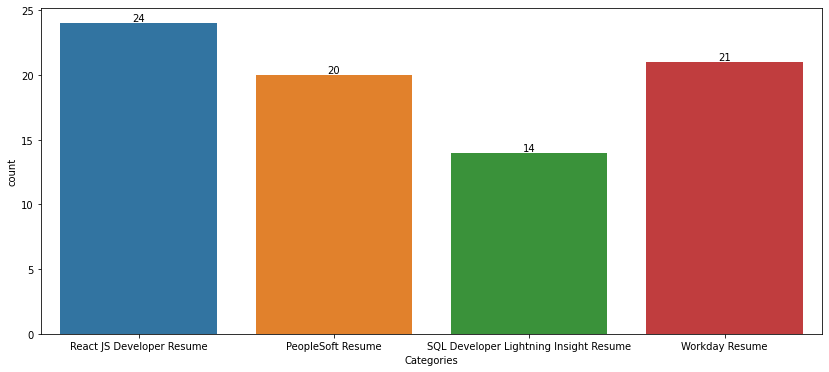

In [33]:
fig, ax = plt.subplots(figsize=(14,6))
sns.countplot(x="Categories", data=df, ax=ax)
ax.bar_label(ax.containers[0], label_type='edge')
plt.show()

In [34]:
#pie plot

targetCounts = df['Categories'].value_counts().reset_index()['Categories']
targetLabels  = df['Categories'].value_counts().reset_index()['index']

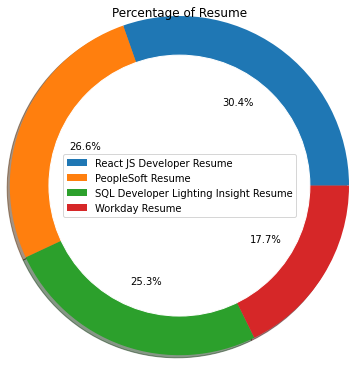

In [35]:
plt.figure(1, figsize=(10,6))

donut= (df['Categories'].value_counts()) 
plt.pie(donut , explode=None,autopct='%1.1f%%',shadow=True,radius=1.3)
circle= plt.Circle( (0,0),1,color='white')
p=plt.gcf()
p.gca().add_artist(circle)

# Adding Title of chart
plt.title('Percentage of Resume')
  
# Add Legends
labels = ['React JS Developer Resume', 'PeopleSoft Resume', 'SQL Developer Lighting Insight Resume', 'Workday Resume']
  
plt.legend(labels, loc='center')
  
# Displaying Chart
plt.show()

In [36]:
from nltk.util import pr

import pandas as pd
import numpy as np

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

import re

import nltk
stemmer = nltk.SnowballStemmer("english")

from nltk.corpus import stopwords
import string

nltk.download('stopwords')
stopword=set(stopwords.words('english'))

import warnings

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [37]:
def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\s+', ' ', text)
    text = re.sub(r'[^\x00-\x7f]', r' ', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text
df["clean_text"] = df["Resumes"].apply(clean)

In [38]:
df

,Resumes,Categories,clean_text
0,HARIPRIYA BATTINA \n\nExperience as UI Develop...,React JS Developer Resume,haripriya battina experi ui develop reactj jav...
1,MAREEDU LOKESH BABU\n\n\n\nPROFESSIONAL OVERVI...,React JS Developer Resume,mareedu lokesh babuprofession overview around ...
2,Name: Ravali P \n\n\n\n ...,React JS Developer Resume,name ravali p curriculum vita special comput s...
3,SUSOVAN BAG \n\nSeeking a challenging po...,React JS Developer Resume,susovan bag seek challeng posit field scienc t...
4,MD KHIZARUDDIN RAUF \n\n \t EXPERIENCE \n\n ...,React JS Developer Resume,md khizaruddin rauf experi current work pick...
...,...,...,...
74,\n Workday Integration Consultant\n\nName...,Workday Resume,workday integr consultantnam sri krishna spro...
75,\nVenkateswarlu.B ...,Workday Resume,venkateswarlub workday consult year experi ...
76,\nHarikrishna Akula\n\n\n\n Summary:\n ❖ 5....,Workday Resume,harikrishna akula summari year experi aroun...
77,\n\n Madeeswar A\n...,Workday Resume,madeeswar aprofil summari around year expe...


Word Cloud

In [39]:
clean_text = df.iloc[:,-1]

In [40]:
clean_text

0     haripriya battina experi ui develop reactj jav...
1     mareedu lokesh babuprofession overview around ...
2     name ravali p curriculum vita special comput s...
3     susovan bag seek challeng posit field scienc t...
4     md khizaruddin rauf experi   current work pick...
                            ...                        
74     workday integr consultantnam sri krishna spro...
75    venkateswarlub workday consult    year experi ...
76    harikrishna akula summari    year experi aroun...
77     madeeswar aprofil summari   around  year expe...
78    workday hcm techno function consult rahul tech...
Name: clean_text, Length: 79, dtype: object

In [41]:
text = ' '.join(clean_text)
text

'haripriya battina experi ui develop reactj javascript phone   gmail haripriyabattinigmaicom locat visakhapatnam job object   look challeng role put experi various aspect technolog object lead sourc inform guidanc concern thtechnolog requir   want part reput organ allow effect use technic skill real world overal growth organ profession career work experi educ  associ ui developr compani blue yonder hyderabad   work done  copernicus  project   main moto project gtm go market portal special design demo team shower case blue yonder product featur custom partner   technolog html css react js   ide vs code   methodolog agil job respons   involv design web page use html css javascript react js   activ handl user stori rais jira tool   analyz stori go applic identifi solut also provid function   use jira bug track system track maintain histori bug everyday basi   btech inform technolog anil neerukonda institut technolog scienc affili andhra univers visakhapatnam year   cgpa   intermedi mpc nr

In [42]:
import nltk
from nltk.tokenize import word_tokenize
# nltk.download('punkt')
text_tokens = word_tokenize(text)
print(text_tokens[0:50])

['haripriya', 'battina', 'experi', 'ui', 'develop', 'reactj', 'javascript', 'phone', 'gmail', 'haripriyabattinigmaicom', 'locat', 'visakhapatnam', 'job', 'object', 'look', 'challeng', 'role', 'put', 'experi', 'various', 'aspect', 'technolog', 'object', 'lead', 'sourc', 'inform', 'guidanc', 'concern', 'thtechnolog', 'requir', 'want', 'part', 'reput', 'organ', 'allow', 'effect', 'use', 'technic', 'skill', 'real', 'world', 'overal', 'growth', 'organ', 'profession', 'career', 'work', 'experi', 'educ', 'associ']


In [43]:
len(text_tokens)
#Remove stopwords
import nltk
from nltk.corpus import stopwords
# nltk.download('punkt')
nltk.download('stopwords')
my_stop_words = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [44]:
no_stop_tokens = [word for word in text_tokens if not word in my_stop_words]
print(no_stop_tokens[0:50])

['haripriya', 'battina', 'experi', 'ui', 'develop', 'reactj', 'javascript', 'phone', 'gmail', 'haripriyabattinigmaicom', 'locat', 'visakhapatnam', 'job', 'object', 'look', 'challeng', 'role', 'put', 'experi', 'various', 'aspect', 'technolog', 'object', 'lead', 'sourc', 'inform', 'guidanc', 'concern', 'thtechnolog', 'requir', 'want', 'part', 'reput', 'organ', 'allow', 'effect', 'use', 'technic', 'skill', 'real', 'world', 'overal', 'growth', 'organ', 'profession', 'career', 'work', 'experi', 'educ', 'associ']


In [45]:
import spacy
nlp = spacy.load("en_core_web_sm")

/usr/local/lib/python3.9/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


In [46]:
doc = nlp(' '.join(no_stop_tokens))
print(doc[0:100])

haripriya battina experi ui develop reactj javascript phone gmail haripriyabattinigmaicom locat visakhapatnam job object look challeng role put experi various aspect technolog object lead sourc inform guidanc concern thtechnolog requir want part reput organ allow effect use technic skill real world overal growth organ profession career work experi educ associ ui developr compani blue yonder hyderabad work done copernicus project main moto project gtm go market portal special design demo team shower case blue yonder product featur custom partner technolog html css react js ide vs code methodolog agil job respons involv design web page use html css javascript react


In [47]:
lemmas = [token.lemma_ for token in doc]
print(lemmas[0:100])

['haripriya', 'battina', 'experi', 'ui', 'develop', 'reactj', 'javascript', 'phone', 'gmail', 'haripriyabattinigmaicom', 'locat', 'visakhapatnam', 'job', 'object', 'look', 'challeng', 'role', 'put', 'experi', 'various', 'aspect', 'technolog', 'object', 'lead', 'sourc', 'inform', 'guidanc', 'concern', 'thtechnolog', 'requir', 'want', 'part', 'reput', 'organ', 'allow', 'effect', 'use', 'technic', 'skill', 'real', 'world', 'overal', 'growth', 'organ', 'profession', 'career', 'work', 'experi', 'educ', 'associ', 'ui', 'developr', 'compani', 'blue', 'yonder', 'hyderabad', 'work', 'do', 'copernicus', 'project', 'main', 'moto', 'project', 'gtm', 'go', 'market', 'portal', 'special', 'design', 'demo', 'team', 'shower', 'case', 'blue', 'yonder', 'product', 'featur', 'custom', 'partner', 'technolog', 'html', 'css', 'react', 'js', 'ide', 'vs', 'code', 'methodolog', 'agil', 'job', 'respon', 'involv', 'design', 'web', 'page', 'use', 'html', 'css', 'javascript', 'react']


In [48]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(lemmas)

In [ ]:
print(vectorizer.vocabulary_)

{'haripriya': 1843, 'battina': 418, 'experi': 1499, 'ui': 4561, 'develop': 1149, 'reactj': 3392, 'javascript': 2195, 'phone': 3047, 'gmail': 1750, 'haripriyabattinigmaicom': 1844, 'locat': 2388, 'visakhapatnam': 4709, 'job': 2211, 'object': 2792, 'look': 2404, 'challeng': 651, 'role': 3614, 'put': 3313, 'various': 4659, 'aspect': 304, 'technolog': 4321, 'lead': 2322, 'sourc': 3959, 'inform': 2050, 'guidanc': 1818, 'concern': 800, 'thtechnolog': 4411, 'requir': 3506, 'want': 4747, 'part': 2956, 'reput': 3503, 'organ': 2880, 'allow': 126, 'effect': 1316, 'use': 4622, 'technic': 4313, 'skill': 3897, 'real': 3404, 'world': 4856, 'overal': 2908, 'growth': 1807, 'profession': 3211, 'career': 596, 'work': 4825, 'educ': 1307, 'associ': 314, 'developr': 1181, 'compani': 766, 'blue': 483, 'yonder': 4892, 'hyderabad': 1942, 'do': 1230, 'copernicus': 888, 'project': 3232, 'main': 2440, 'moto': 2621, 'gtm': 1811, 'go': 1752, 'market': 2495, 'portal': 3102, 'special': 3969, 'design': 1122, 'demo': 1

In [49]:
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");

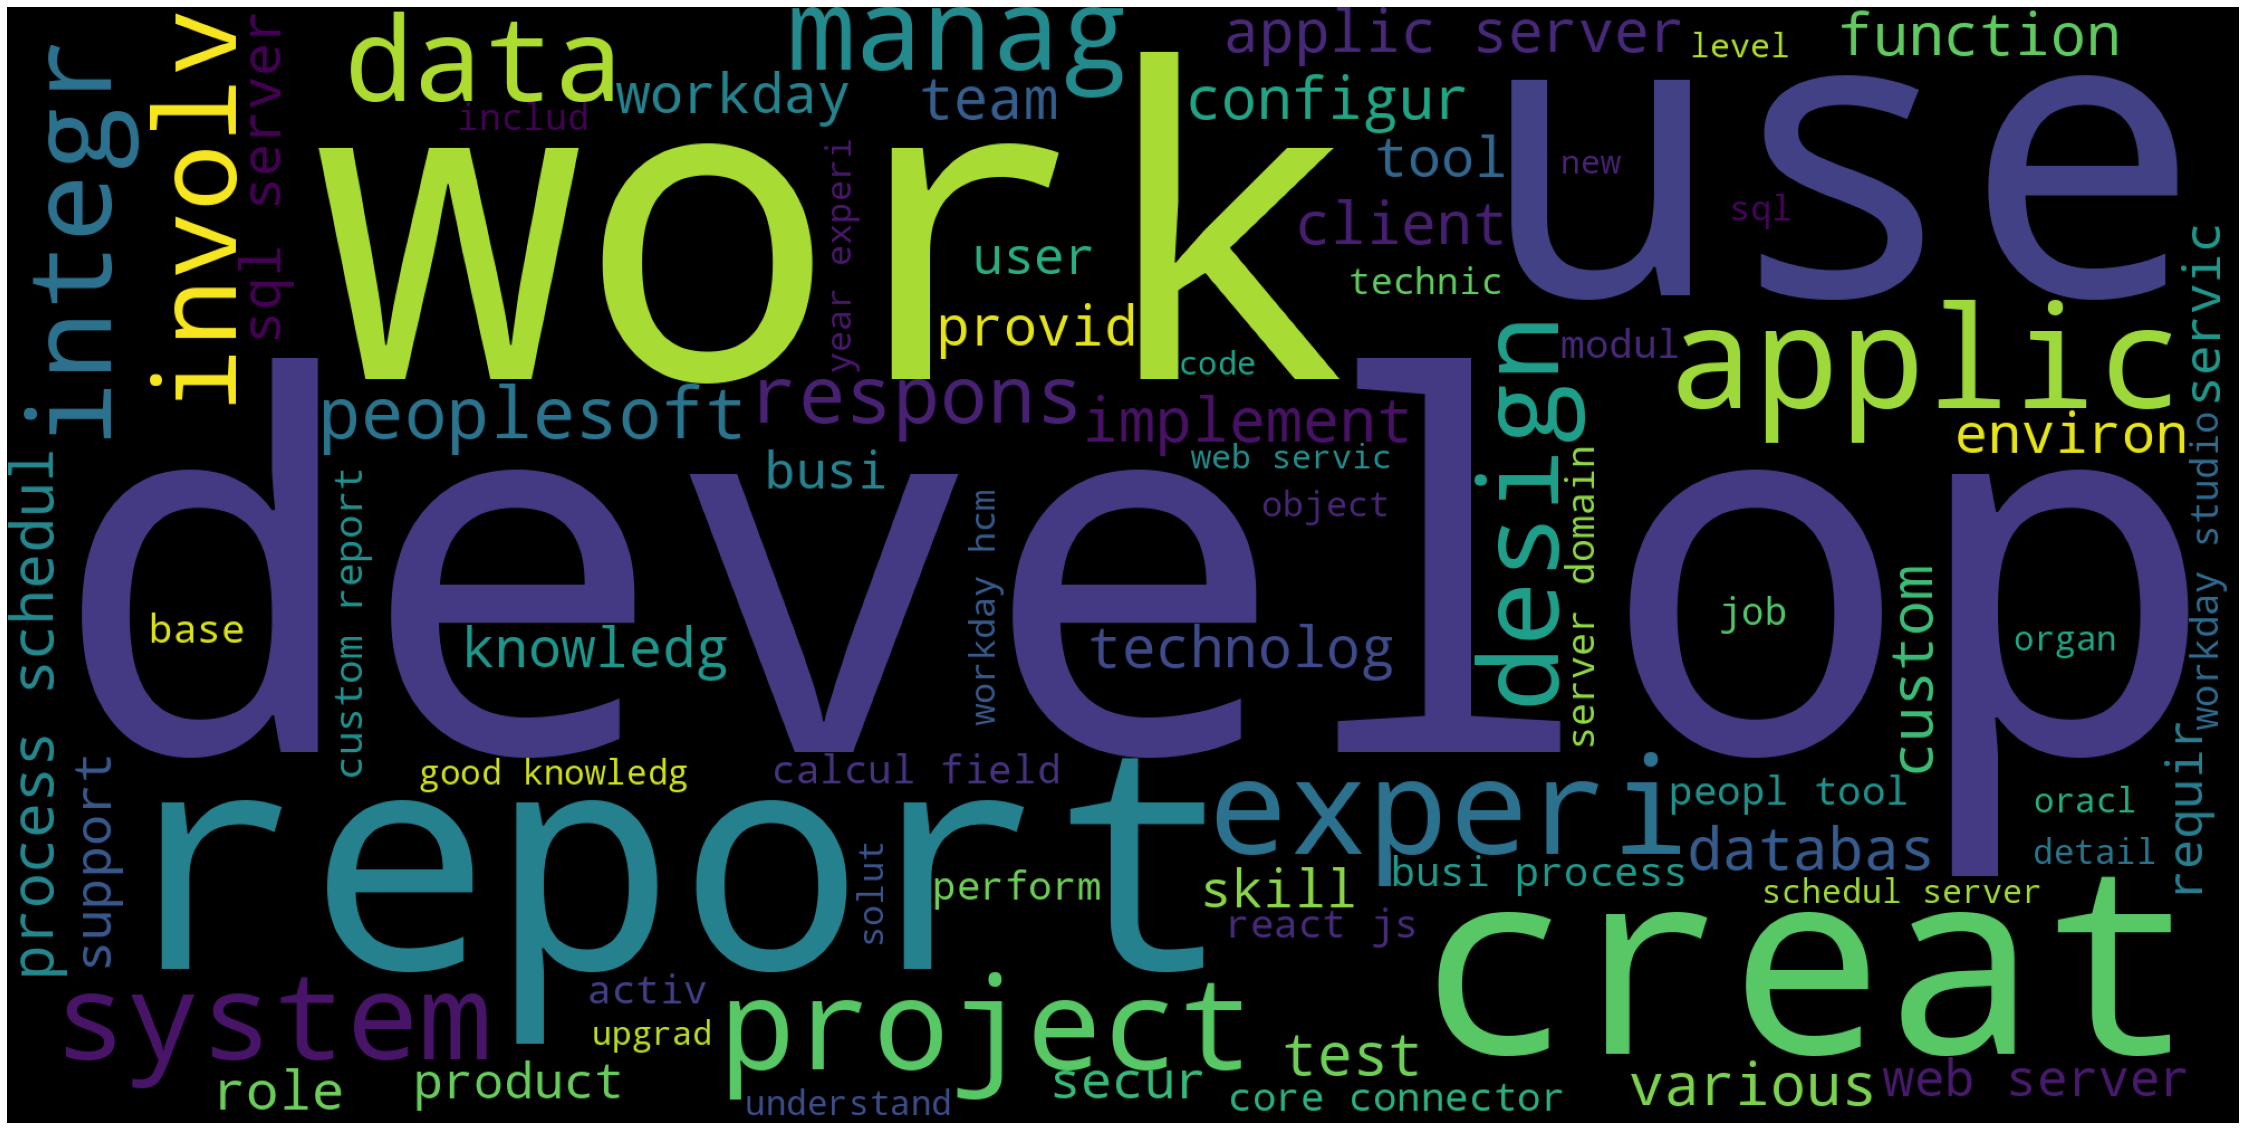

In [50]:
wordcloud = WordCloud(width = 2000, height = 1000, background_color='black', max_words=75).generate(text)
# Plot
plot_cloud(wordcloud)

##Vectorizing

In [137]:
!pip install self

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for self: filename=self-2020.12.3-py3-none-any.whl size=1401 sha256=2cd9f08986bb6140e4a591e139e9bd279c5741f341fa8069647da52ad2d3da10
  Stored in directory: /root/.cache/pip/wheels/e3/81/77/defb77c0492a679ec13ac2b7ed030ce2c6fc7dda6ac112f5d1
Successfully built self


In [138]:
import self

In [136]:
X = df['clean_text']
y = df['Categories']

In [125]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.30, random_state=42)

In [126]:
Xtrain.shape , Xtest.shape , ytrain.shape , ytest.shape

((55,), (24,), (55,), (24,))

In [139]:
cv = CountVectorizer()

self._vectorizer = cv
Xtrain = self._vectorizer.fit_transform(Xtrain) 

self._vectorizer.get_feature_names_out()
Xtrain

<55x4117 sparse matrix of type '<class 'numpy.int64'>'
	with 13471 stored elements in Compressed Sparse Row format>

In [140]:
Xtest = self._vectorizer.transform(Xtest)
self._vectorizer.get_feature_names_out()
Xtest

<24x4117 sparse matrix of type '<class 'numpy.int64'>'
	with 3891 stored elements in Compressed Sparse Row format>

LOGISTIC REGRESSION MODEL

In [141]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
clf = LogisticRegression(max_iter=1000)
clf.fit(Xtrain, ytrain)

LogisticRegression(max_iter=1000)

In [142]:
y_pred=clf.predict(Xtest)

In [143]:
from sklearn.metrics import accuracy_score

In [144]:
score=accuracy_score(ytest,y_pred)
print(score)

0.9583333333333334


In [145]:
print(classification_report(ytest,y_pred))

                                        precision    recall  f1-score   support

                     PeopleSoft Resume       1.00      1.00      1.00         6
             React JS Developer Resume       0.89      1.00      0.94         8
SQL Developer Lightning Insight Resume       1.00      0.75      0.86         4
                        Workday Resume       1.00      1.00      1.00         6

                              accuracy                           0.96        24
                             macro avg       0.97      0.94      0.95        24
                          weighted avg       0.96      0.96      0.96        24



NAIVE BAYES

In [146]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB().fit(Xtrain, ytrain)

In [147]:
ypred=model.predict(Xtest)

In [148]:
from sklearn.metrics import accuracy_score,classification_report

In [149]:
NBscore=accuracy_score(ytest,ypred)
print(NBscore)

1.0


In [150]:
print(classification_report(ytest,ypred))

                                        precision    recall  f1-score   support

                     PeopleSoft Resume       1.00      1.00      1.00         6
             React JS Developer Resume       1.00      1.00      1.00         8
SQL Developer Lightning Insight Resume       1.00      1.00      1.00         4
                        Workday Resume       1.00      1.00      1.00         6

                              accuracy                           1.00        24
                             macro avg       1.00      1.00      1.00        24
                          weighted avg       1.00      1.00      1.00        24



SVM MODEL

In [155]:
from sklearn.svm import SVC
clf1 = SVC(kernel='rbf')
clf1.fit(Xtrain,ytrain)

SVC()

In [156]:
ypred1=clf1.predict(Xtest)

In [157]:
from sklearn.metrics import accuracy_score,classification_report

In [158]:
svcscore=accuracy_score(ytest,ypred1)
print(svcscore)

0.875


In [159]:
print(classification_report(ytest,ypred1))

                                        precision    recall  f1-score   support

                     PeopleSoft Resume       1.00      0.67      0.80         6
             React JS Developer Resume       0.73      1.00      0.84         8
SQL Developer Lightning Insight Resume       1.00      0.75      0.86         4
                        Workday Resume       1.00      1.00      1.00         6

                              accuracy                           0.88        24
                             macro avg       0.93      0.85      0.87        24
                          weighted avg       0.91      0.88      0.87        24



RANDOM FOREST MODEL

In [160]:
from sklearn.ensemble import RandomForestClassifier
model1 = RandomForestClassifier(n_estimators=100)
model1.fit(Xtrain, ytrain)

RandomForestClassifier()

In [161]:
ypred3 = model1.predict(Xtest)

In [162]:
from sklearn.metrics import accuracy_score,classification_report

In [163]:
RFscore=accuracy_score(ytest,ypred3)
print(RFscore)

0.9583333333333334


In [164]:
print(classification_report(ytest,ypred3))

                                        precision    recall  f1-score   support

                     PeopleSoft Resume       1.00      1.00      1.00         6
             React JS Developer Resume       0.89      1.00      0.94         8
SQL Developer Lightning Insight Resume       1.00      0.75      0.86         4
                        Workday Resume       1.00      1.00      1.00         6

                              accuracy                           0.96        24
                             macro avg       0.97      0.94      0.95        24
                          weighted avg       0.96      0.96      0.96        24



DECISION TREE MODEL

In [165]:
from sklearn.tree import DecisionTreeClassifier
model2 = DecisionTreeClassifier()
model2.fit(Xtrain, ytrain)

DecisionTreeClassifier()

In [166]:
ypred4 = model2.predict(Xtest)

In [167]:
from sklearn.metrics import accuracy_score,classification_report

In [168]:
DTscore=accuracy_score(ytest,ypred4)
print(DTscore)

0.9583333333333334


In [169]:
print(classification_report(ytest,ypred4))

                                        precision    recall  f1-score   support

                     PeopleSoft Resume       1.00      1.00      1.00         6
             React JS Developer Resume       0.89      1.00      0.94         8
SQL Developer Lightning Insight Resume       1.00      0.75      0.86         4
                        Workday Resume       1.00      1.00      1.00         6

                              accuracy                           0.96        24
                             macro avg       0.97      0.94      0.95        24
                          weighted avg       0.96      0.96      0.96        24



KNN MODEL

In [170]:
from sklearn.neighbors import KNeighborsClassifier
k = 5
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(Xtrain, ytrain)

KNeighborsClassifier()

In [171]:
ypred5 = knn.predict(Xtest)

In [172]:
KNNscore=accuracy_score(ytest,ypred5)
print(KNNscore)

0.8333333333333334


In [173]:
print(classification_report(ytest,ypred5))

                                        precision    recall  f1-score   support

                     PeopleSoft Resume       1.00      1.00      1.00         6
             React JS Developer Resume       0.67      1.00      0.80         8
SQL Developer Lightning Insight Resume       1.00      0.25      0.40         4
                        Workday Resume       1.00      0.83      0.91         6

                              accuracy                           0.83        24
                             macro avg       0.92      0.77      0.78        24
                          weighted avg       0.89      0.83      0.81        24



Label encoding

In [202]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [203]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 52)

In [204]:
X_train.shape , X_test.shape , y_train.shape , y_test.shape

((55,), (24,), (55,), (24,))

In [205]:
cv = CountVectorizer()

self._vectorizer = cv
X_train = self._vectorizer.fit_transform(X_train) 

self._vectorizer.get_feature_names_out()
X_train

<55x3784 sparse matrix of type '<class 'numpy.int64'>'
	with 12222 stored elements in Compressed Sparse Row format>

In [206]:
X_test = self._vectorizer.transform(X_test)
self._vectorizer.get_feature_names_out()
X_test

<24x3784 sparse matrix of type '<class 'numpy.int64'>'
	with 4802 stored elements in Compressed Sparse Row format>

XGBM MODEL

In [207]:
import xgboost as xgb
xgb_clf = xgb.XGBClassifier(objective='multi:softmax')
xgb_clf.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softmax', predictor=None, ...)

In [208]:
ypred6 = xgb_clf.predict(X_test)

In [209]:
xgbscore=accuracy_score(y_test,ypred6)
print(xgbscore)

0.875


In [210]:
from sklearn.metrics import accuracy_score,classification_report

In [215]:
print(classification_report(y_test,ypred6))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89         4
           1       0.83      1.00      0.91         5
           2       1.00      0.57      0.73         7
           3       0.89      1.00      0.94         8

    accuracy                           0.88        24
   macro avg       0.88      0.89      0.87        24
weighted avg       0.89      0.88      0.86        24



In [ ]:
Model_Accuracy = pd.DataFrame({'Losigistic': score, 'DT': DTscore, 'RF': RFscore, 'SVM': svcscore, 'NB': NBscore, 'KNN': KNNscore, 'XGBM': xgbscore, 'LGBM': lgbscore}, index=['Accuracy'] )

In [ ]:
Model_Accuracy.T

,Accuracy
Losigistic,0.958333
DT,0.958333
RF,0.875000
SVM,0.916667
NB,1.000000
KNN,0.833333
XGBM,0.875000
LGBM,0.958333


Prediction

In [152]:
sample = 'I have experience in DML, DDL, RDBMS and have handson experience on Stored procedures'
w = self._vectorizer.transform([sample]).toarray()
abc = model.predict(w)
print(abc)

['SQL Developer Lightning Insight Resume']


In [153]:
sample = 'Experienced in developing User Interface using HTML5, CSS3, Bootstrap, JavaScript, DOM, JSON'
a = self._vectorizer.transform([sample]).toarray()
abc1 = model.predict(a)
print(abc1)

['React JS Developer Resume']


In [154]:
sample = 'Experienced in HCM, Payroll, Compensation'
b = self._vectorizer.transform([sample]).toarray()
abc1 = model.predict(b)
print(abc1)

['Workday Resume']
